In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

from bs4 import BeautifulSoup
import os

# !conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')

Libraries imported.
Solving environment: ...working... done

# All requested packages already installed.



In [24]:
CLIENT_ID = 'GFL4E1RLR345IU4I2DHFQKNJZRFPERHZD0GYEEOHJV5OQ1LM' # your Foursquare ID
CLIENT_SECRET = 'GSVEEXLDU0YEAHH1EO152PQ0KRMSARPEJSFDVYS1PXWUNYRC' # your Foursquare Secret
VERSION = '20201127'

In [4]:
url='https://cocl.us/new_york_dataset'
resp=requests.get(url).json()
# all data is present in features label
features=resp['features']
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
# instantiate the dataframe
new_york_data = pd.DataFrame(columns=column_names)
for data in features:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    new_york_data = new_york_data.append({'Borough': borough,
                                      'Neighborhood': neighborhood_name,
                                      'Latitude': neighborhood_lat,
                                      'Longitude': neighborhood_lon}, ignore_index=True)

In [6]:
df =new_york_data

In [10]:
df.head(5)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


### Let's see how many neighborhoods are there per Borough

In [11]:
df.Borough.value_counts()

Queens           81
Brooklyn         70
Staten Island    63
Bronx            52
Manhattan        40
Name: Borough, dtype: int64

Text(0, 0.5, '# of Neighborhoods')

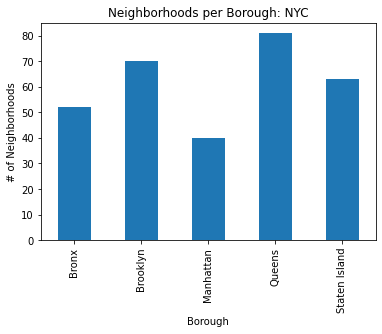

In [23]:
df.groupby('Borough')['Neighborhood'].count().plot.bar()
plt.title('Neighborhoods per Borough: NYC')
plt.xlabel('Borough')
plt.ylabel('# of Neighborhoods')

In [25]:
def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [27]:
# queens has most neighborhoods
# prepare neighborhood list that contains japanese restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
chinese_df=pd.DataFrame(columns=column_names)
count=1
for row in df.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    chinese_restaurant=venues[venues['Category']=='Chinese Restaurant']   

    for resturant_detail in chinese_restaurant.values.tolist():
        id, name , category=resturant_detail
        chinese_df = chinese_df.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

In [28]:
chinese_df

,Borough,Neighborhood,ID,Name
0,Bronx,Co-op City,4c9d5f2654c8a1cd2e71834b,Guang Hui Chinese Restaurant
1,Bronx,Eastchester,4dabc3dc93a04642f09ccabd,Xing Lung Chinese Restaurant
2,Bronx,Norwood,4e41d2c4b61ca5ba3b1f9c6b,Ming Liang Kitchen
3,Bronx,Pelham Parkway,4b9d6b45f964a52078ab36e3,Mr. Q's Chinese Restaurant
4,Bronx,Bedford Park,4e4d0387bd413c4cc66dfd72,Hung Hing Chinese Restaurant
5,Bronx,Bedford Park,4cba4a550180721ebb739961,Rose Flower Chinese
6,Bronx,Bedford Park,4d081644e554721e5423c0f8,Wai Kang Kitchen Chinese Food
7,Bronx,Fordham,4cf30a837e93f04d366a5669,China Wok II
8,Bronx,East Tremont,4ccf58277f56a1434cfec6a6,Wings Chinese Restaurant
9,Bronx,West Farms,4cd0d4d77b6854810401c4f8,Food Hai


In [ ]:
chinese_df.to_csv()

In [29]:
chinese_df.groupby('')

(180, 4)